In [1]:
# import statements
import numpy as np 
import f90nml
import random
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load in data function
def load_data(file_name):
    # loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
    # we use skiprows=1 to avoid the header
    all_data = np.loadtxt(file_name,skiprows=1)
    # We transpose the array in order to be able to extract each column individually
    all_data = all_data.transpose()
    
    return all_data

def plots(fname):
    file = fname
    data = load_data(file)
    t = data[0]
    x1 = data[1]
    y1 = data[2]
    x2 = data[3]
    y2 = data[4]
    E = data[5]
    I = data[6]
    x_focus = 0
    y_focus = 0
    
    # orbits
    plt.scatter(x_focus, y_focus, color='y')
    plt.plot(x1, y1)
    plt.plot(x2, y2)
    plt.xlabel('x position')
    plt.ylabel('y position')
    title_name = 'Orbits: ' + fname
    plt.title(title_name)
    plt.gca().legend(('Object 1','Object 2', 'Focus'), bbox_to_anchor = (1,1))
    plt.show()
    
    # energy
    plt.plot(t, E)
    plt.xlabel('Time')
    plt.ylabel('Energy')
    title_name = 'Energy: ' + fname
    plt.title(title_name)
    plt.show()
    
    # angular momentum
    plt.plot(t, I)
    plt.xlabel('Time')
    plt.ylabel('Angular Momentum')
    title_name = 'Angular Momentum: ' + fname
    plt.title(title_name)
    plt.show()
    return
    

**Namelists generator**

In [6]:
nml = f90nml.read('planet.namelist')

In [142]:
# moon planet system, nml_rsult_1.dat
s = 1
nml['masses']['primary_mass'] = 1
nml['masses']['planet_mass_1'] = 0.02
nml['masses']['planet_mass_2'] = 0.00005
nml['initial_conditions']['initial_pos_1'] = [20, 0]
nml['initial_conditions']['initial_pos_2'] = [21, -0.2]
nml['initial_conditions']['initial_vel_1'] = [0, 0.2]
nml['initial_conditions']['initial_vel_2'] = [0.008, 0.2588]
nml['solution_parameters']['final_time'] = 450
nml['solution_parameters']['n_steps'] = 5500
nml['output']['output_file'] = ('nml_result_' + str(s) + '.dat')
nml.write(path + 'planet_moon_' + str(s) + '.namelist')
 

In [156]:
# two planet system, nml_result_2.dat
s = 2
nml['masses']['primary_mass'] = 1
nml['masses']['planet_mass_1'] = 0.009
nml['masses']['planet_mass_2'] = 0.0085
nml['initial_conditions']['initial_pos_1'] = [20, 0]
nml['initial_conditions']['initial_pos_2'] = [60, -0.2]
nml['initial_conditions']['initial_vel_1'] = [0, 0.2]
nml['initial_conditions']['initial_vel_2'] = [0.008, 0.143]
nml['solution_parameters']['final_time'] = 6200
nml['solution_parameters']['n_steps'] = 64000
nml['output']['output_file'] = ('nml_result_' + str(s) + '.dat')
nml.write(path + 'two_planet_' + str(s) + '.namelist')

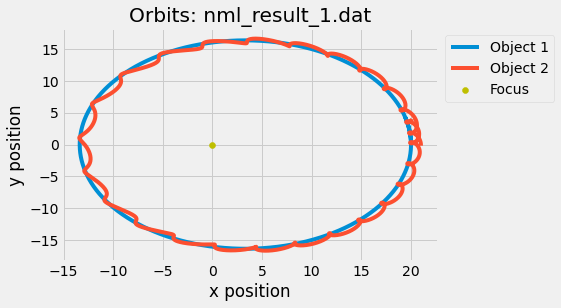

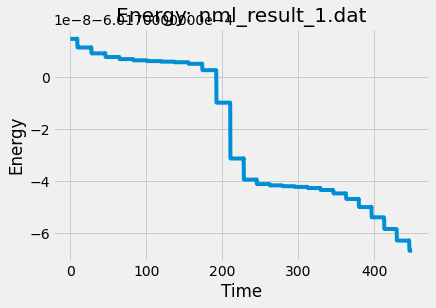

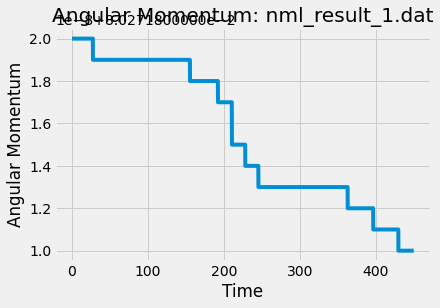

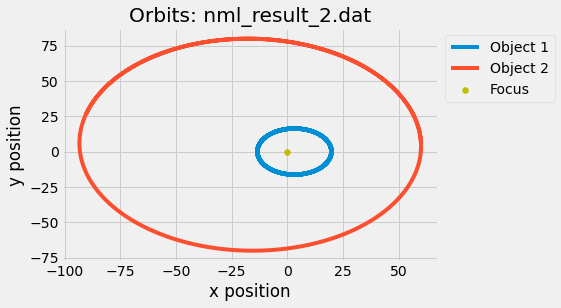

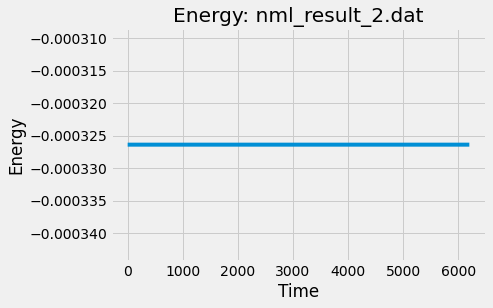

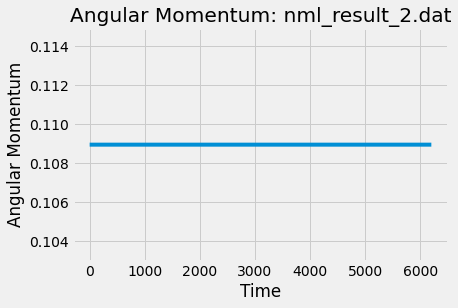

In [3]:
# plots 1
plots('nml_result_1.dat')

# plots 2
plots('nml_result_2.dat')